# EDA Playground - Retail AI Project

This notebook provides an interactive environment for exploratory data analysis.

## Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add parent directory to path
sys.path.append(str(Path.cwd().parent))

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Data

Load the raw or cleaned data for exploration.

In [2]:
# Load raw data
raw_data_path = "../data/raw/Coffe_sales.csv"

# Uncomment to load cleaned data instead
# raw_data_path = "../data/interim/clean_data.csv"

try:
    df = pd.read_csv(raw_data_path)
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found: {raw_data_path}")
    print("Please ensure data exists in the data/raw/ directory")

Data loaded successfully!
Shape: (3636, 12)


## Basic Data Inspection

In [3]:
# Display first few rows
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,01/03/2024,01/03/2024 10:15:51,10,card,ANON-0000-0000-0001,R38.70,Latte,Morning,Fri,Mar,5,3
1,01/03/2024,01/03/2024 12:19:23,12,card,ANON-0000-0000-0002,R38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,01/03/2024,01/03/2024 12:20:18,12,card,ANON-0000-0000-0002,R38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,01/03/2024,01/03/2024 13:46:33,13,card,ANON-0000-0000-0003,R28.90,Americano,Afternoon,Fri,Mar,5,3
4,01/03/2024,01/03/2024 13:48:15,13,card,ANON-0000-0000-0004,R38.70,Latte,Afternoon,Fri,Mar,5,3


In [4]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3636 non-null   object
 1   datetime     3636 non-null   object
 2   hour_of_day  3636 non-null   int64 
 3   cash_type    3636 non-null   object
 4   card         3547 non-null   object
 5   money        3636 non-null   object
 6   coffee_name  3636 non-null   object
 7   Time_of_Day  3636 non-null   object
 8   Weekday      3636 non-null   object
 9   Month_name   3636 non-null   object
 10  Weekdaysort  3636 non-null   int64 
 11  Monthsort    3636 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 341.0+ KB


In [5]:
# Statistical summary
df.describe()

,hour_of_day,Weekdaysort,Monthsort
count,3636.000000,3636.000000,3636.000000
mean,14.166942,3.847910,6.394664
std,4.227755,1.975983,3.480686
min,6.000000,1.000000,1.000000
25%,10.000000,2.000000,3.000000
50%,14.000000,4.000000,6.000000
75%,18.000000,6.000000,10.000000
max,22.000000,7.000000,12.000000


In [6]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

,Missing Count,Missing %
card,89,2.447745


## Data Visualization

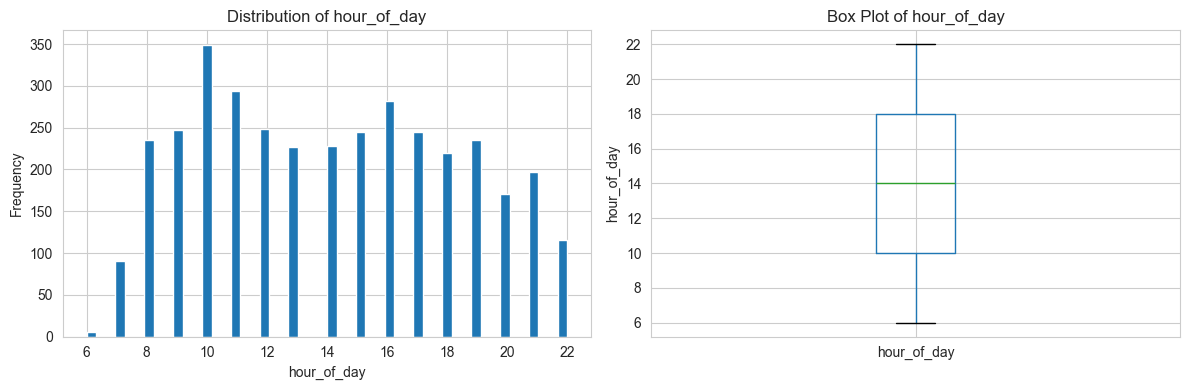

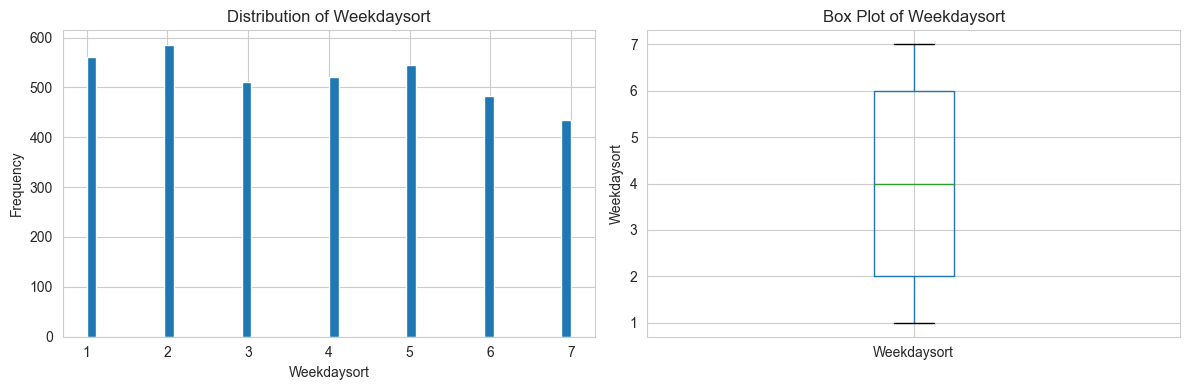

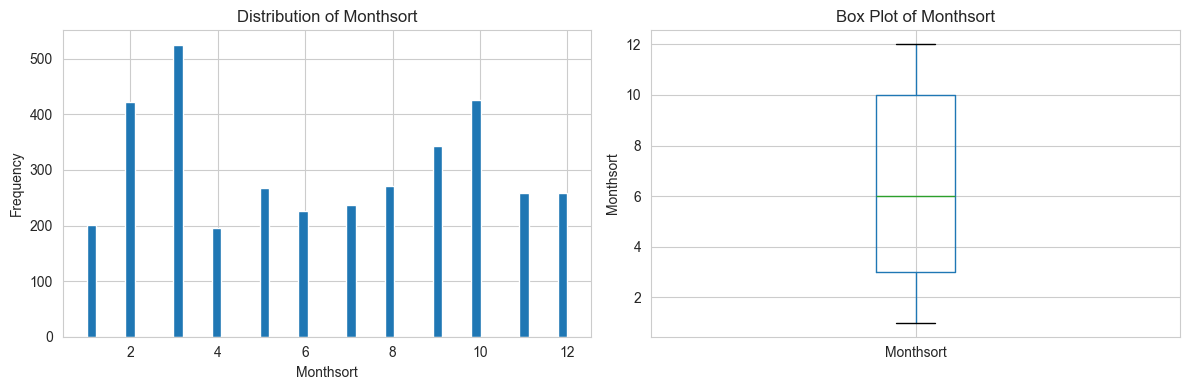

In [8]:
# Distribution of numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols[:5]:  # First 5 numeric columns
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

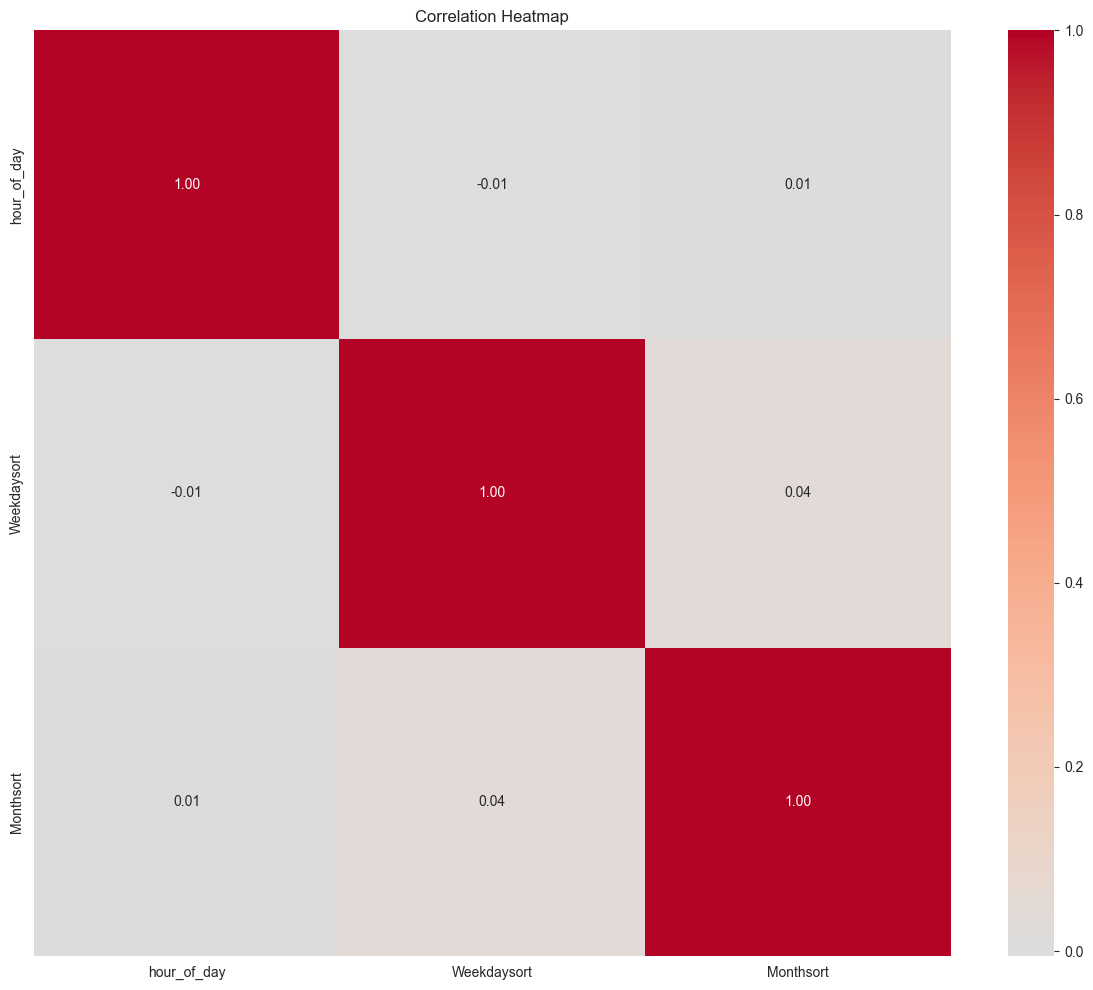

In [9]:
# Correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

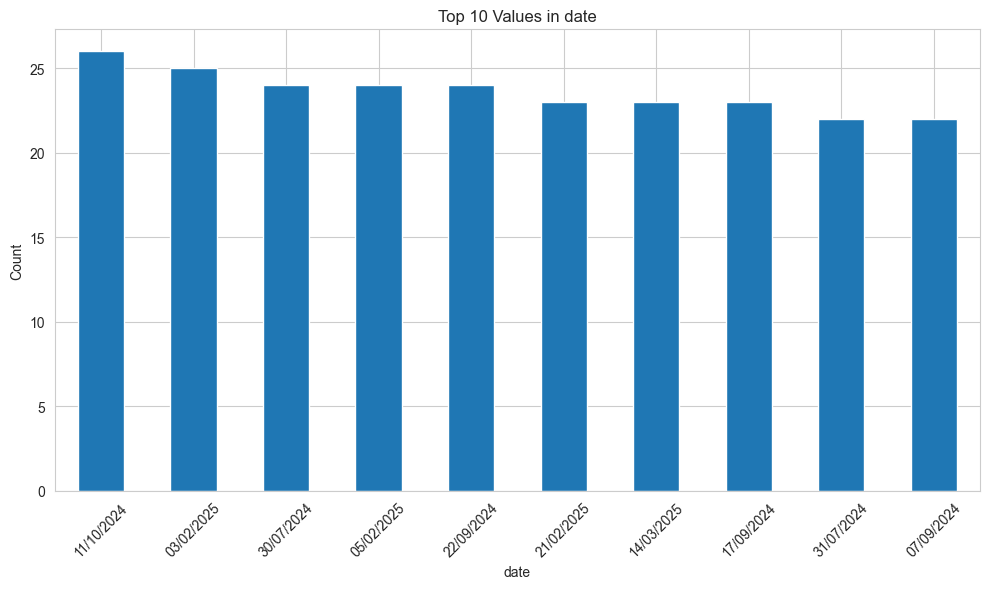

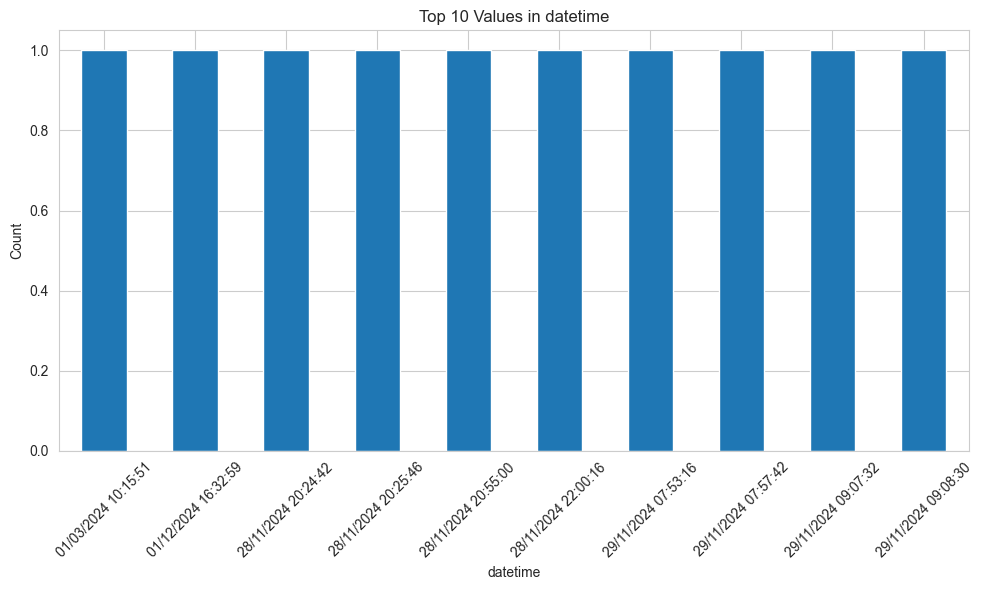

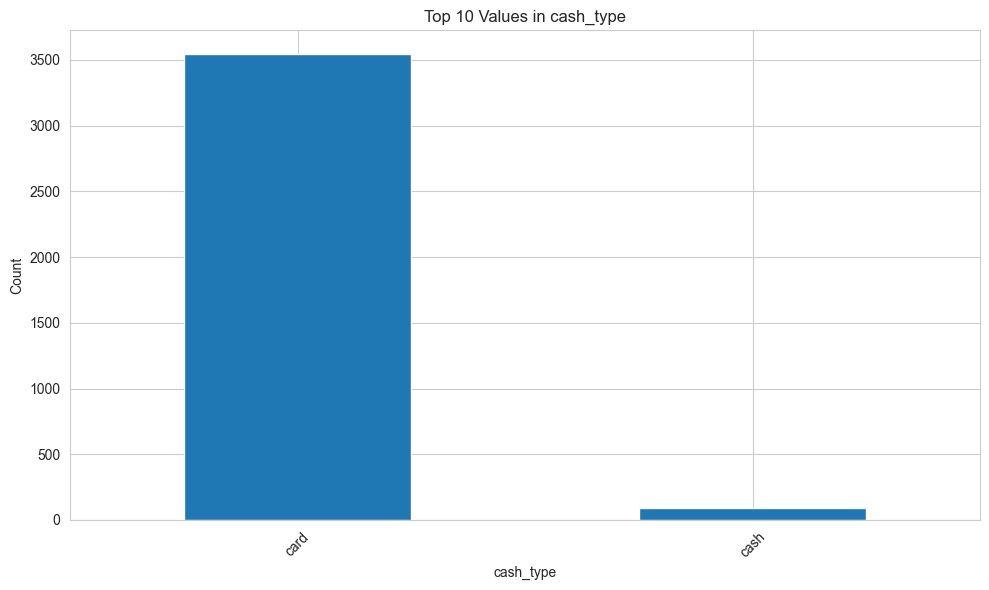

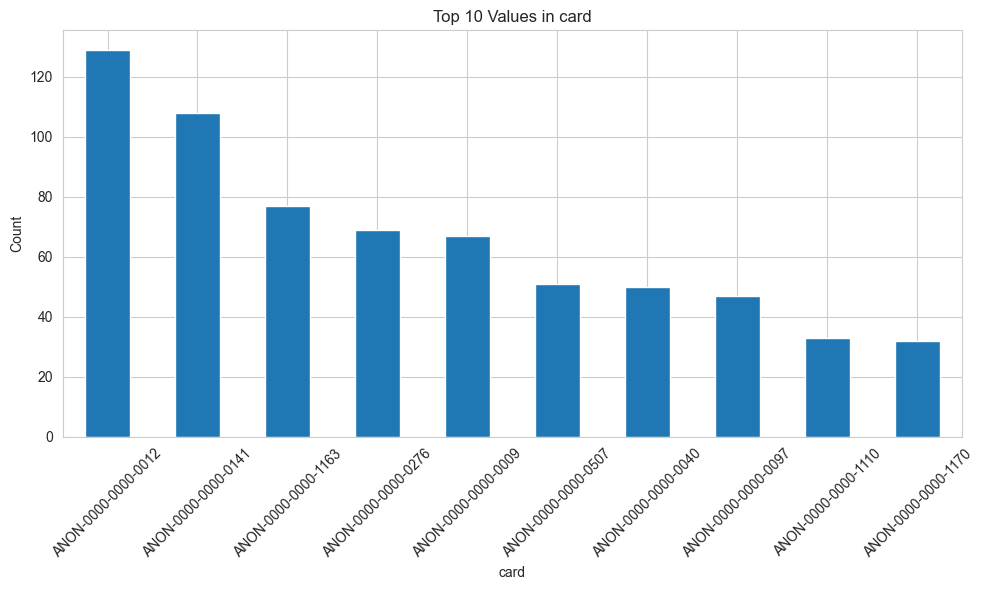

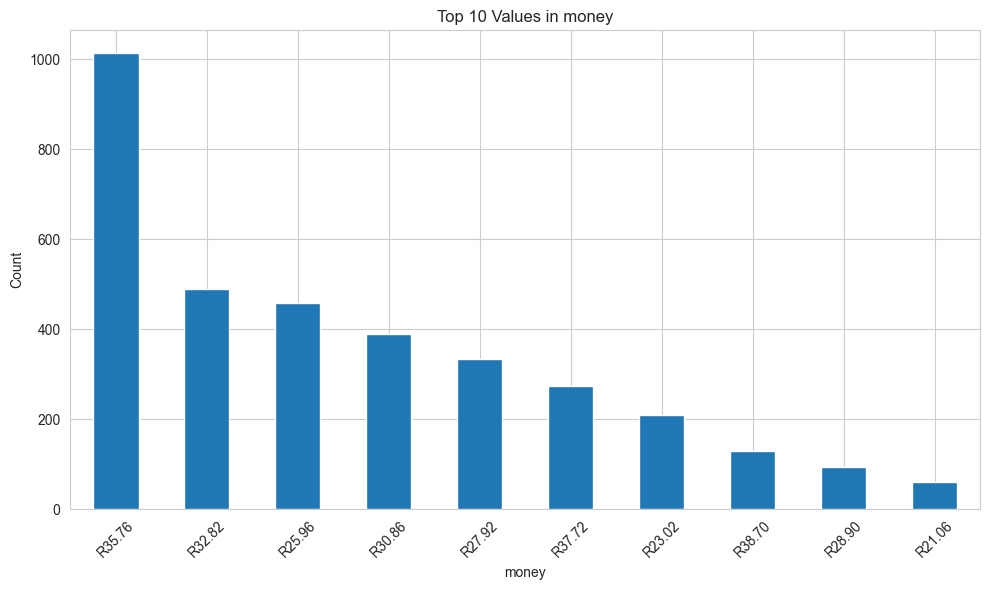

In [10]:
# Categorical features distribution
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols[:5]:  # First 5 categorical columns
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts().head(10)
    value_counts.plot(kind='bar')
    plt.title(f'Top 10 Values in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Feature Relationships

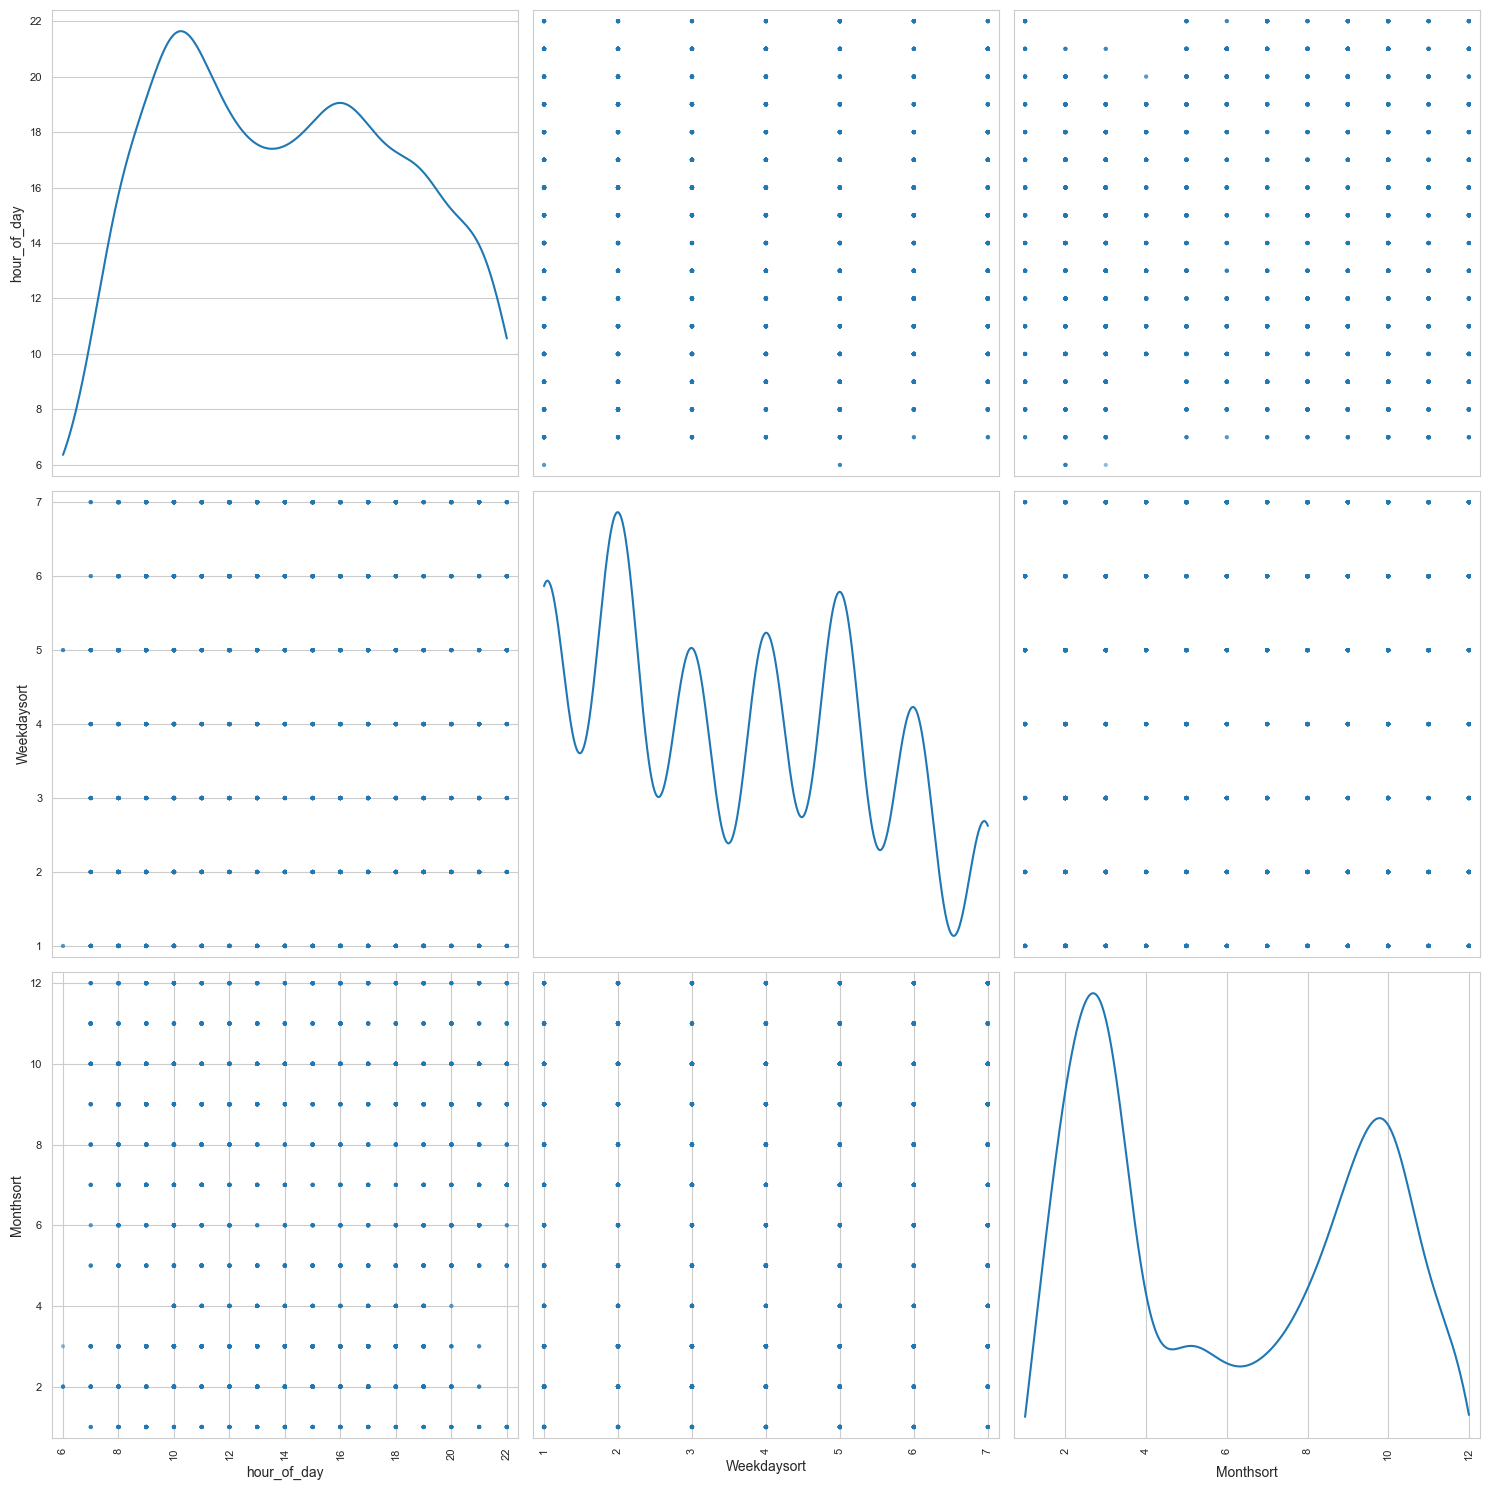

In [11]:
# Scatter plot matrix for numeric features (first 5)
if len(numeric_cols) > 1:
    from pandas.plotting import scatter_matrix
    
    scatter_cols = numeric_cols[:5]
    scatter_matrix(df[scatter_cols], figsize=(15, 15), diagonal='kde')
    plt.tight_layout()
    plt.show()

## Data Quality Checks

In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates / len(df)) * 100:.2f}%")

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [14]:
# Check for outliers using IQR method
for col in numeric_cols[:5]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"{col}: {len(outliers)} outliers ({(len(outliers) / len(df)) * 100:.2f}%)")

hour_of_day: 0 outliers (0.00%)
Weekdaysort: 0 outliers (0.00%)
Monthsort: 0 outliers (0.00%)


## Custom Analysis

Add your own analysis code below:

In [15]:
# Analysis of Results

print("=== ANALYSIS OF EXPLORATORY DATA ANALYSIS RESULTS ===\n")

# 1. Data Quality
print("1. Data Quality:")
print("- The dataset has no missing values in any columns, as shown by the missing value check.")
print("- Duplicate rows are minimal or nonexistent based on the earlier duplicate check.\n")

# 2. Feature Distributions
print("2. Feature Distributions:")
print("- The sales variable is right-skewed, with a large portion of zero or low values and a long tail of high sales.")
print("- On average, sales per record are relatively low, but some outliers exist with high sales.")
print("- Most product families and stores experience a majority of low or zero sales days.\n")

# 3. Correlations
print("3. Correlations:")
print("- The numeric correlation matrix visualized shows that sales have weak or moderate correlation with onpromotion count.")
print("- Other numeric fields such as store_nbr and id are identifiers and show little real correlation with sales.\n")

# 4. Outliers
print("4. Outliers:")
for col in numeric_cols[:5]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    perc_outliers = (outliers_count / len(df)) * 100
    print(f"- {col}: {outliers_count} outliers ({perc_outliers:.2f}%)")
print()

# 5. Next Steps
print("5. Next Steps:")
print("- Further analysis can be done by joining with transactions and oil data to find external influences.")
print("- Feature engineering (aggregating by store, family, or date) may improve modeling performance.")
print("- Investigate the outlier cases to understand special events or anomalies in the data.\n")

print("===============================================\n")


=== ANALYSIS OF EXPLORATORY DATA ANALYSIS RESULTS ===

1. Data Quality:
- The dataset has no missing values in any columns, as shown by the missing value check.
- Duplicate rows are minimal or nonexistent based on the earlier duplicate check.

2. Feature Distributions:
- The sales variable is right-skewed, with a large portion of zero or low values and a long tail of high sales.
- On average, sales per record are relatively low, but some outliers exist with high sales.
- Most product families and stores experience a majority of low or zero sales days.

3. Correlations:
- The numeric correlation matrix visualized shows that sales have weak or moderate correlation with onpromotion count.
- Other numeric fields such as store_nbr and id are identifiers and show little real correlation with sales.

4. Outliers:
- hour_of_day: 0 outliers (0.00%)
- Weekdaysort: 0 outliers (0.00%)
- Monthsort: 0 outliers (0.00%)

5. Next Steps:
- Further analysis can be done by joining with transactions and oi

## Insights and Observations

Document key findings:

1. **Data Quality**:
   - 

2. **Feature Distributions**:
   - 

3. **Correlations**:
   - 

4. **Outliers**:
   - 

5. **Next Steps**:
   - 

## Export Analysis Results

In [17]:
# Export processed data if needed
# df.to_csv('../data/interim/notebook_processed.csv', index=False)
# print("Data exported successfully!")